<a href="https://colab.research.google.com/github/zzmtsvv/mlinvest/blob/main/finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install yahoo_fin
! pip install yfinance

     |████████████████████████████████| 81 kB 5.5 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 127 kB 29.5 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 79 kB 10.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13503 sha256=a5747f6e5985e4d7d594058357cbc58de910c3e39005d45a62452725c7f19270
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=3431a811d0131a7051bcb5794d2874e443d8fe8027fe8740fdb027dd99b0f9a3
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=86a8dec81f3f4c109485c61051ff71df248f23344c355ed1e4fa7812bcfd1fce
  Stored in directory: /root/.ca

In [2]:
! pip install tslearn

     |████████████████████████████████| 793 kB 8.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import yfinance as yf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [4]:
import yahoo_fin.stock_info as si
sp500 = si.tickers_sp500()

In [5]:
def get_info(ticker_obj):
  info_keys = ['shortName', 'sector', 'industry', 'country', 'market']
  info_values = []
  for key in info_keys:
    info_values.append(ticker_obj.info.get(key, None))
  return dict(zip(info_keys, info_values))

In [25]:
stocks = []
ticker_list = ['alrs.me', 'fxru.me', 'fxwo.me', 'dsky.me', 'moex.me', 'lnta.me',
               'gazp.me', 'mtss.me', 'zyne', 'tatn.me', 'f', 'chmf.me',
               'dte.de', 'levi', 'hpq', 'gps', 'poly.me', 'five.me', 'cour',
               'bac', 'pfe', 'hhr.me', 'ozon',
               'lyft', 'tsla', 'coke', 'gs', 'tgt', 'vow3.de', 'mcd', 'spot',
               'nvda', 'tm', 'nike', 'jpm', 'lkoh.me', 'gm', 'bayn.de',
               'fxcn.me', 'sbspb.me', 'fxmm.me', 'fxru.me', 'fxgd.me', 'fxtb.me',
               'ms', 'rblx']
# tickers = ticker_list
tickers = np.random.choice(sp500, size=100)

for ticker in tqdm(tickers):
  try:
    ticker_obj = yf.Ticker(ticker)
    info = get_info(ticker_obj)
    close_price = ticker_obj.history(period='3mo')['Close'].to_dict()
    info.update(close_price)
    stocks.append(info)
  except:
    print('fail', ticker)

stocks = pd.DataFrame(stocks)

  0%|          | 0/100 [00:00<?, ?it/s]

In [37]:
stocks.dropna(axis=1, how='any', inplace=True)

In [38]:
stocks

,shortName,sector,industry,country,market,2021-05-10 00:00:00,2021-05-11 00:00:00,2021-05-12 00:00:00,2021-05-13 00:00:00,2021-05-14 00:00:00,2021-05-17 00:00:00,2021-05-18 00:00:00,2021-05-19 00:00:00,2021-05-20 00:00:00,2021-05-21 00:00:00,2021-05-24 00:00:00,2021-05-25 00:00:00,2021-05-26 00:00:00,2021-05-27 00:00:00,2021-05-28 00:00:00,2021-06-01 00:00:00,2021-06-02 00:00:00,2021-06-03 00:00:00,2021-06-04 00:00:00,2021-06-07 00:00:00,2021-06-08 00:00:00,2021-06-09 00:00:00,2021-06-10 00:00:00,2021-06-11 00:00:00,2021-06-14 00:00:00,2021-06-15 00:00:00,2021-06-16 00:00:00,2021-06-17 00:00:00,2021-06-18 00:00:00,2021-06-21 00:00:00,2021-06-22 00:00:00,2021-06-23 00:00:00,2021-06-24 00:00:00,2021-06-25 00:00:00,2021-06-28 00:00:00,2021-06-29 00:00:00,2021-06-30 00:00:00,2021-07-01 00:00:00,2021-07-02 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,2021-07-19 00:00:00,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,2021-07-28 00:00:00,2021-07-29 00:00:00,2021-07-30 00:00:00,2021-08-03 00:00:00,2021-08-04 00:00:00,2021-08-05 00:00:00,2021-08-06 00:00:00
0,"Teradyne, Inc.",Technology,Semiconductor Equipment & Materials,United States,us_market,121.744576,121.414841,114.510246,117.148178,122.254181,119.766136,118.676979,122.314140,126.520844,124.782196,127.590004,128.529999,129.059998,130.589996,132.350006,130.779999,131.009995,128.320007,131.679993,130.800003,126.779999,124.709999,127.870003,127.980003,131.479996,130.309998,128.279999,129.589996,124.860001,126.220001,125.959999,127.199997,130.610001,129.550003,132.750000,134.309998,133.960007,129.380005,128.529999,126.470001,123.440002,122.820000,125.699997,127.080002,126.790001,126.269997,123.129997,119.889999,120.059998,123.779999,128.460007,126.720001,128.800003,127.430000,123.459999,122.080002,125.650002,127.000000,126.739998,127.900002,126.580002,126.870003
1,CVS Health Corporation,Healthcare,Healthcare Plans,United States,us_market,85.333199,83.862114,82.878067,83.762711,83.822357,84.050964,88.076591,88.672974,88.533821,89.269363,89.169968,88.166046,86.794350,85.899773,85.919655,85.353088,85.472359,86.535919,85.949471,85.810318,85.293442,84.438614,84.985306,84.955490,84.110611,84.885910,84.229881,83.722961,81.903969,83.514214,83.305481,83.225967,83.265724,83.573860,83.613617,82.987404,82.937714,81.725052,81.933792,80.691315,80.850349,79.737099,80.830475,81.327461,81.168427,81.923851,81.575958,81.228065,80.184380,81.307587,82.559998,82.629997,83.269997,82.870003,83.639999,83.300003,83.059998,82.360001,84.000000,81.550003,80.050003,81.250000
2,Carnival Corporation,Consumer Cyclical,Travel Services,United States,us_market,26.270000,25.879999,24.780001,25.120001,27.200001,27.520000,28.000000,27.680000,27.530001,27.170000,27.900000,28.580000,29.370001,30.000000,29.559999,30.150000,31.309999,30.670000,30.540001,30.889999,31.080000,30.450001,29.830000,29.930000,28.750000,28.610001,29.280001,28.420000,28.180000,28.670000,28.059999,28.150000,27.459999,28.129999,26.150000,25.780001,26.360001,26.360001,26.059999,25.020000,24.080000,23.719999,24.260000,23.860001,22.850000,22.580000,21.950001,20.920000,19.719999,21.190001,23.190001,22.709999,21.959999,23.160000,22.799999,22.820000,22.709999,21.650000,21.430000,21.040001,22.549999,23.080000
3,J.M. Smucker Company (The) New,Consumer Defensive,Packaged Foods,United States,us_market,137.565369,135.906525,133.900009,136.190002,135.330002,133.509995,133.720001,134.300003,134.809998,135.509995,135.610001,135.289993,134.500000,132.520004,133.289993,133.509995,135.929993,137.880005,139.820007,138.130005,136.869995,135.970001,135.679993,136.240005,136.100006,134.779999,133.779999,133.610001,130.300003,131.119995,130.520004,129.059998,128.570007,129.419998,130.839996,130.139999,129.570007,130.050003,129.690002,128.580002,129.039993,129.52

In [39]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(stocks.iloc[:, 5:].T).T

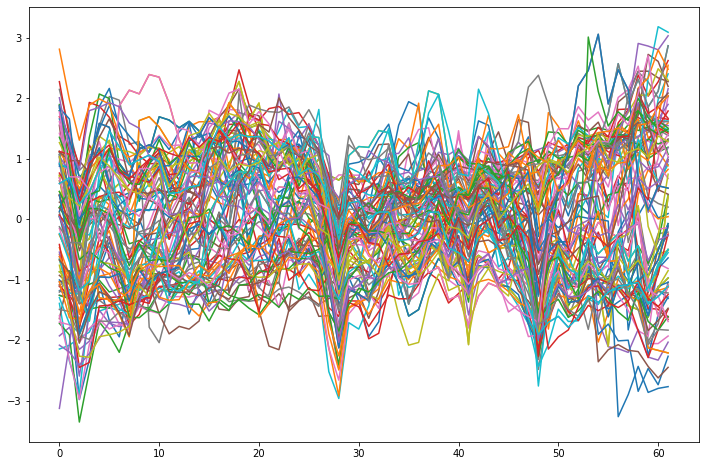

In [40]:
plt.figure(figsize=(12,8))
plt.plot(tickers_scaled.T)

  0%|          | 0/9 [00:00<?, ?it/s]

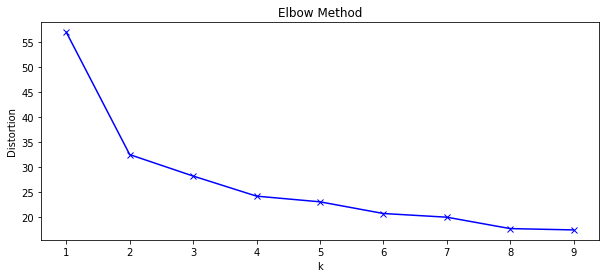

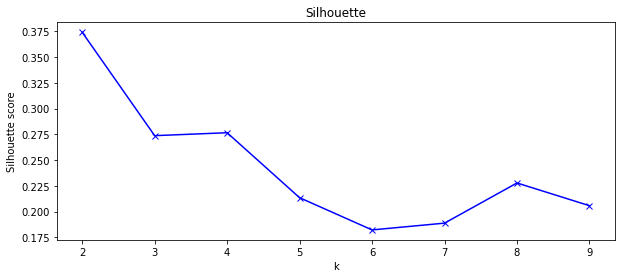

In [41]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    km = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10)
    km.fit(tickers_scaled)
    distortions.append(km.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, km.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [42]:
n_clusters = 6
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=3, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=10,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=6, n_init=1, n_jobs=3,
                 random_state=None, tol=1e-06, verbose=0)

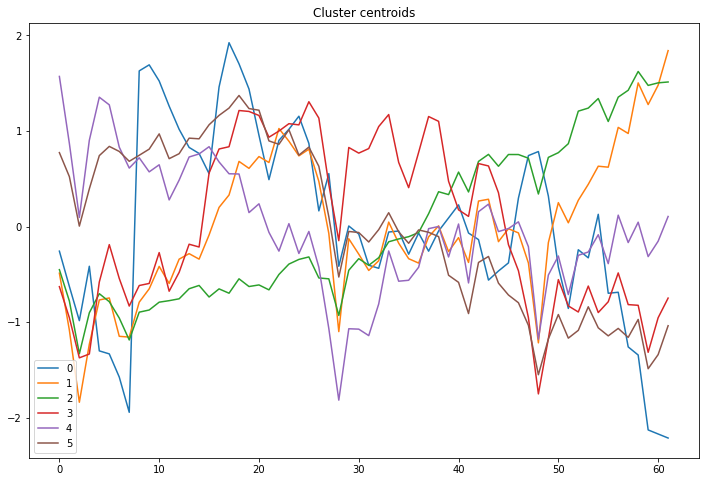

In [43]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [44]:
stocks['cluster'] = ts_kmeans.predict(tickers_scaled)
pd.DataFrame(stocks.groupby('cluster')['sector'].value_counts())

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 100 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


sector
cluster sector                        
0       Consumer Defensive           2
1       Technology                   3
        Healthcare                   2
        Industrials                  2
        Real Estate                  2
        Financial Services           1
        Utilities                    1
2       Healthcare                   7
        Industrials                  6
        Consumer Cyclical            5
        Financial Services           5
        Real Estate                  4
        Consumer Defensive           3
        Technology                   3
        Utilities                    1
3       Energy                       7
        Consumer Cyclical            1
        Industrials                  1
        Real Estate                  1
        Technology                   1
4       Financial Services           5
        Consumer Cyclical            3
        Industrials                  3
        Technology                   2
        Consumer Defensive           1
        Healthcare                   1
        Utilities                    1
5       Consumer Cyclical            6
        Financial Services           5
        Energy                       4
        Consumer Defensive           3
        Healthcare                   3
        Technology                   2
        Basic Materials              1
        Communication Services       1
        Industrials                  1

In [45]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0] / 4)),
        4,
        figsize=(15, 3 * int(np.ceil(current_cluster.shape[0] / 4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.shortName}\n{row.sector}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


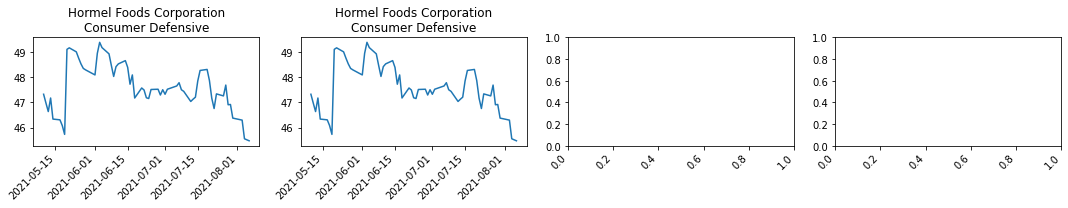

                          Cluster number: 1


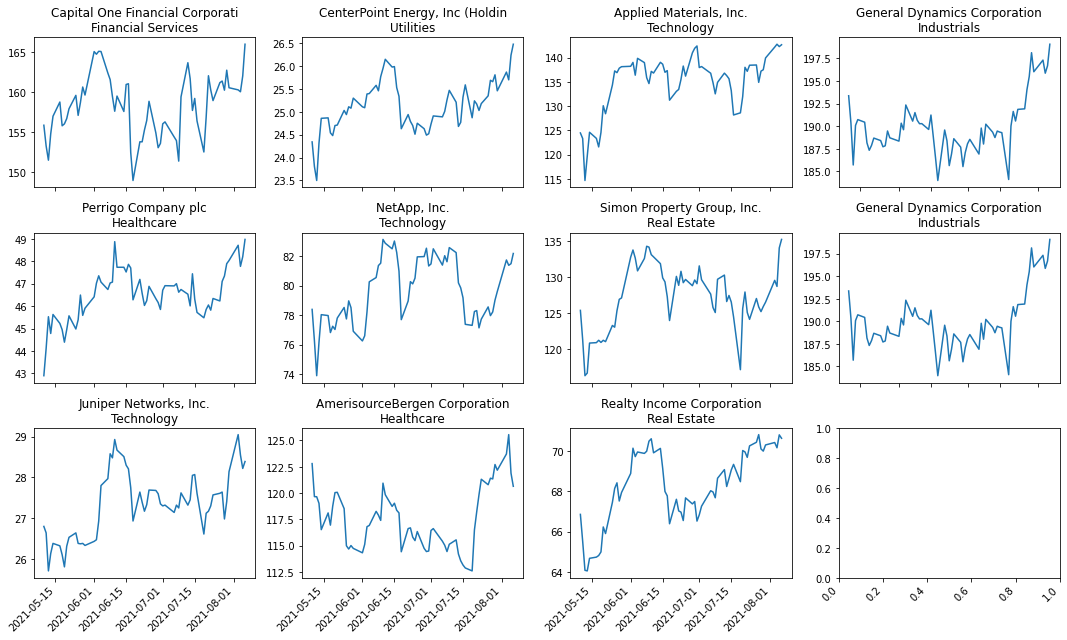

                          Cluster number: 2


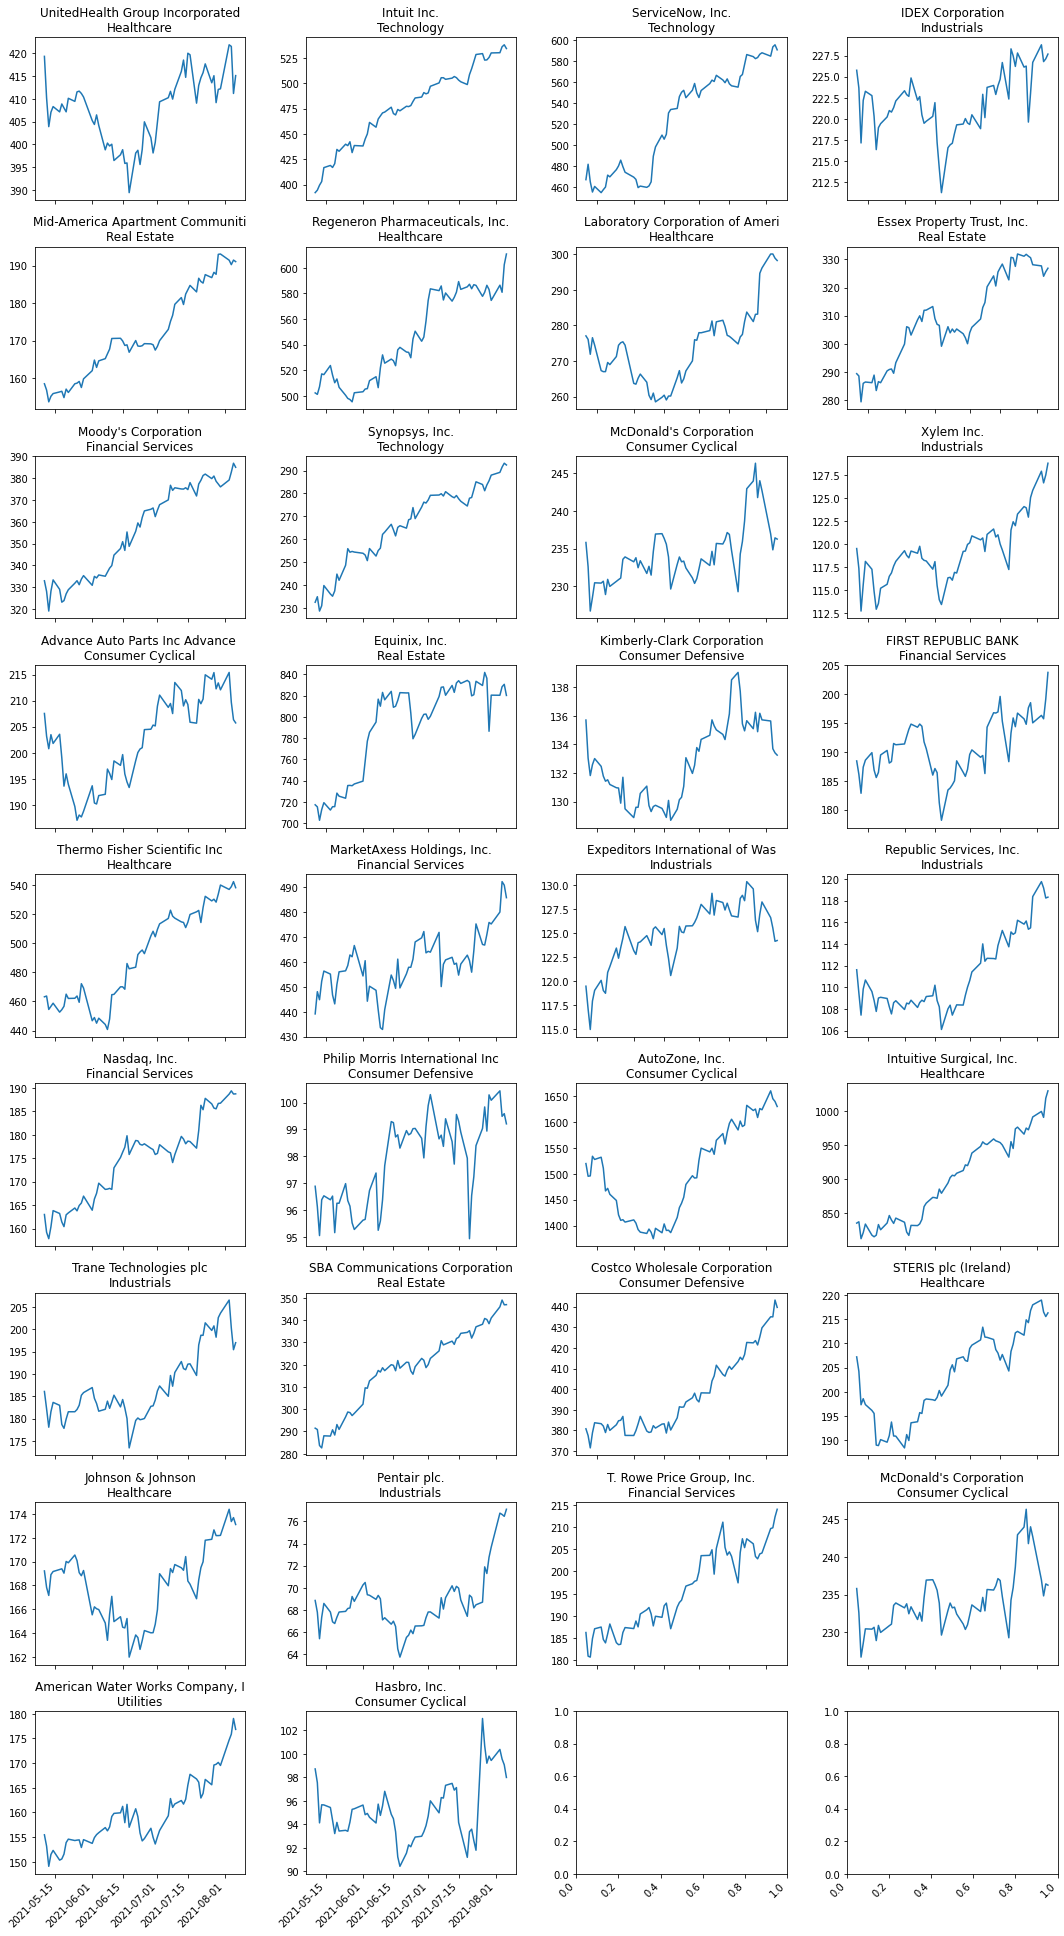

                          Cluster number: 3


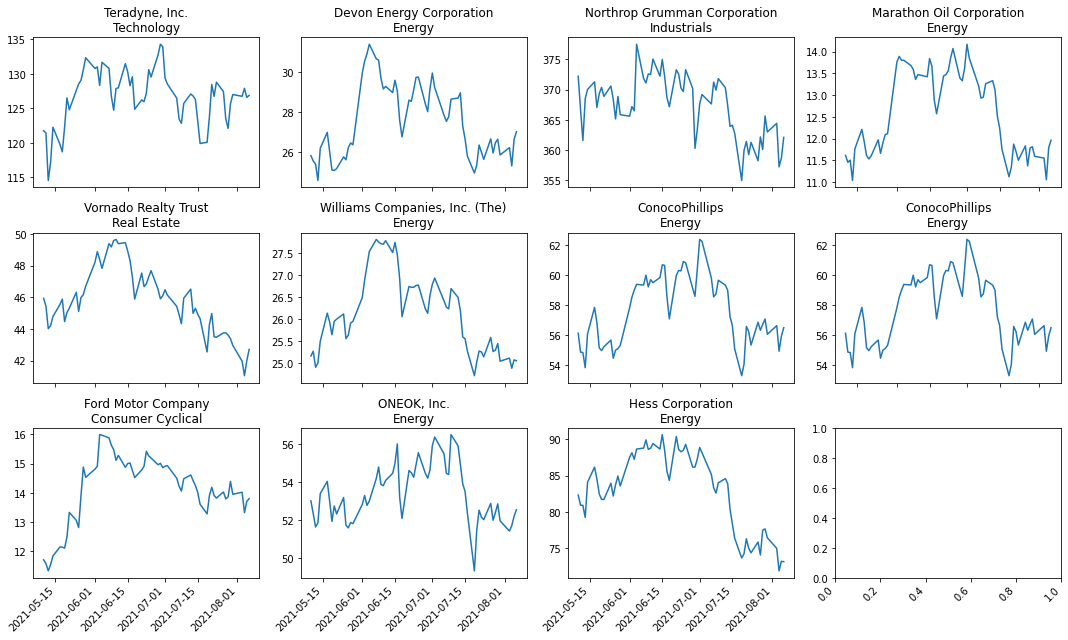

                          Cluster number: 4


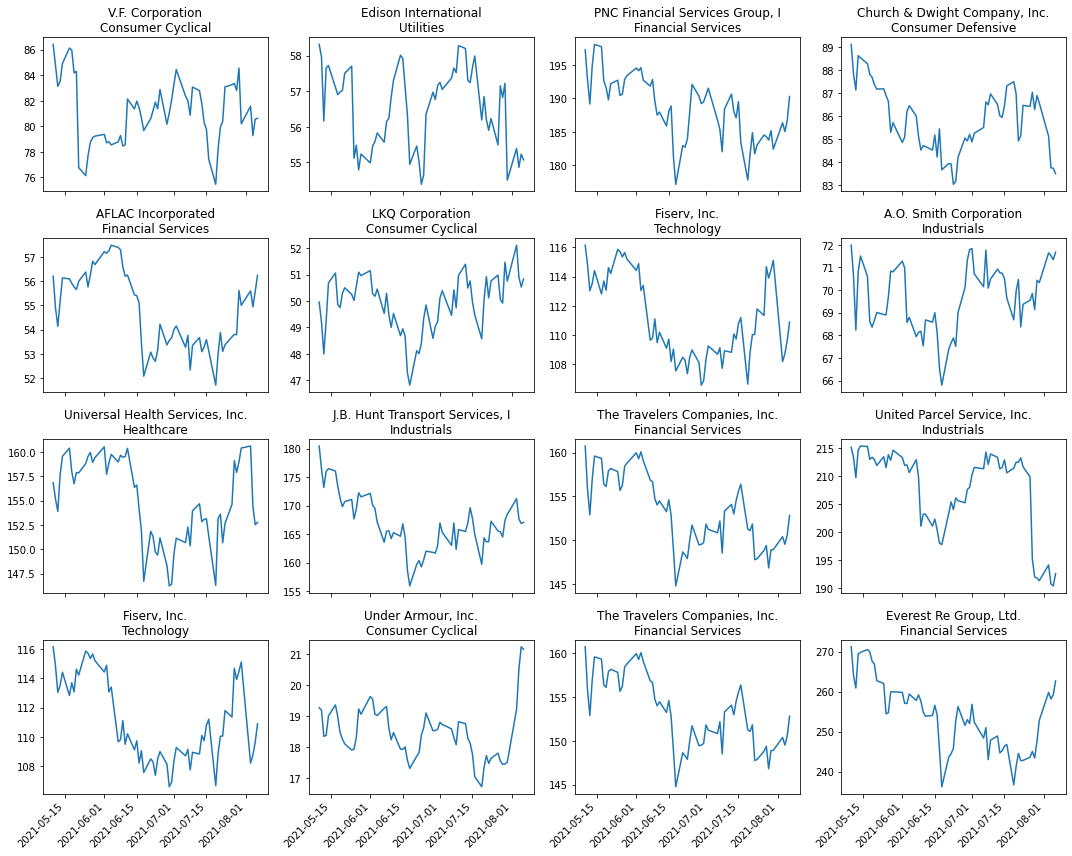

                          Cluster number: 5


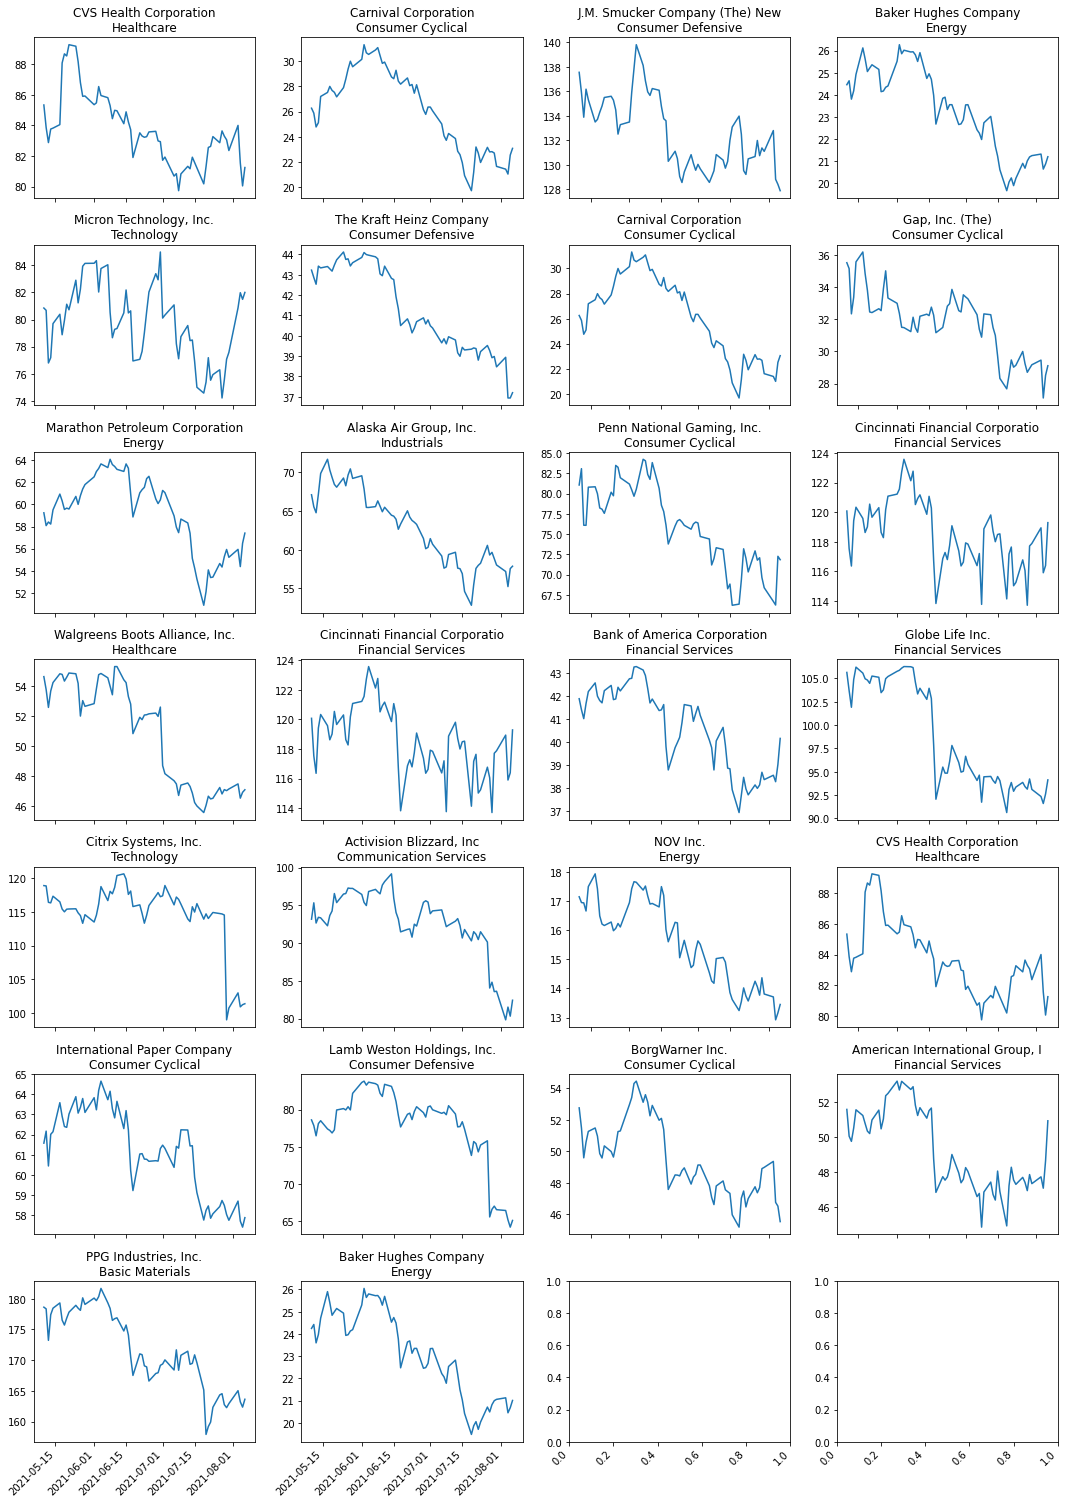

In [46]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(stocks[stocks.cluster == cluster])